# CSCI 4502: Data Mining - Final Project
## By Chaz Morton and Luke Campbell

The goal of this project is to predict the playType (run, pass, punt, or field goal) for American football. Stakeholders of our research are fans that enjoy sports betting, coaches who want to get an edge on their opponent, football players, and fans who are just generally interested in football. Many of people are invested in
the outcome as well as the individual decisions made during the game, letting play type prediction be a major interest for many. In this notebook we will preprocess the data, analyze the features, create 3 separate models, and analyze our findings.

In [2]:
import pandas as pd

# 1: Creating a Combined Dataframe

Our data is coming from the NFL Big Data Bowls on Kaggle for the years 2020-2022. Since they are separate challenges, the data is spread out between different csv files. We will create dataframes for each play type (run, pass, punt, field goal) and then combine them into one major dataframe. 

## Setting up Run Dataframe

In [3]:
df_2020 = pd.read_csv('Data/NFL2020.csv')

df_runs = df_2020[["GameId", "PlayId", "YardLine", "Quarter", "GameClock", "PossessionTeam", "Down", "Distance", "FieldPosition", "HomeTeamAbbr", "VisitorTeamAbbr", "HomeScoreBeforePlay", "VisitorScoreBeforePlay"]]

# Adding playType "Run"
df_runs["playType"] = "Run"

/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/4215964505.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv('Data/NFL2020.csv')
/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/4215964505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs["playType"] = "Run"


In [4]:
df_runs.head(5)

,GameId,PlayId,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeTeamAbbr,VisitorTeamAbbr,HomeScoreBeforePlay,VisitorScoreBeforePlay,playType
0,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
1,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
2,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
3,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
4,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run


In [5]:
# Number of Unique Games in df_runs

uniqueGameIds_runs = df_runs.GameId.unique()
uniqueGameIdsCount_runs = len(uniqueGameIds_runs)

print("Number of Unique Games for 2020 dataset: ", uniqueGameIdsCount_runs)

Number of Unique Games for 2020 dataset:  688


In [6]:
# Entire df_runs with unique plays (every game)

df_runs_uniquePlays = df_runs.drop_duplicates(subset=["GameId", "PlayId"])
df_runs_uniquePlays

,GameId,PlayId,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeTeamAbbr,VisitorTeamAbbr,HomeScoreBeforePlay,VisitorScoreBeforePlay,playType
0,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
22,2017090700,20170907000139,43,1,13:52:00,NE,1,10,NE,NE,KC,0,0,Run
44,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0,0,Run
66,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0,0,Run
88,2017090700,20170907000395,25,1,12:08:00,KC,1,10,KC,NE,KC,7,0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682044,2019112500,20191125003419,46,4,09:47:00,BLT,1,10,BLT,LA,BAL,6,42,Run
682066,2019112500,20191125003440,47,4,09:03:00,BLT,2,9,BLT,LA,BAL,6,42,Run
682088,2019112500,20191125003496,13,4,08:04:00,BLT,1,10,LA,LA,BAL,6,42,Run
682110,2019112500,20191125003768,37,4,04:55:00,BLT,1,10,BLT,LA,BAL,6,45,Run


In [7]:
print(df_runs_uniquePlays.count())

GameId                    31007
PlayId                    31007
YardLine                  31007
Quarter                   31007
GameClock                 31007
PossessionTeam            31007
Down                      31007
Distance                  31007
FieldPosition             30616
HomeTeamAbbr              31007
VisitorTeamAbbr           31007
HomeScoreBeforePlay       31007
VisitorScoreBeforePlay    31007
playType                  31007
dtype: int64


## Setting up Passing Dataframe

In [8]:
df_2021_plays = pd.read_csv('Data/NFL2021Plays.csv')
df_2021_games = pd.read_csv('Data/NFL2021Games.csv')

df_passes = df_2021_plays[["gameId", "playId", "yardlineNumber", "quarter", "gameClock", "possessionTeam", "down", "yardsToGo", "yardlineSide", "preSnapHomeScore", "preSnapVisitorScore"]]

for col in ["homeTeamAbbr", "visitorTeamAbbr"]:
    df_passes[col] = None
    
for index, row in df_passes.iterrows():
    nowGameId = row["gameId"]
    matching_row = df_2021_games[df_2021_games['gameId'] == nowGameId]
    print("ROW: ", matching_row)
    df_passes.at[index, "homeTeamAbbr"] = matching_row["homeTeamAbbr"].iloc[0]
    df_passes.at[index, "visitorTeamAbbr"] = matching_row["visitorTeamAbbr"].iloc[0]
    

# Adding playType "Pass"
df_passes["playType"] = "Pass"

/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/66257692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes[col] = None
/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/66257692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes[col] = None
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Cu

In [9]:
df_passes.head()

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
0,2018090600,75,20,1,15:00:00,ATL,1,15,ATL,0.0,0.0,PHI,ATL,Pass
1,2018090600,146,39,1,13:10:00,ATL,1,10,PHI,0.0,0.0,PHI,ATL,Pass
2,2018090600,168,39,1,13:05:00,ATL,2,10,PHI,0.0,0.0,PHI,ATL,Pass
3,2018090600,190,39,1,13:01:00,ATL,3,10,PHI,0.0,0.0,PHI,ATL,Pass
4,2018090600,256,1,1,10:59:00,ATL,3,1,PHI,0.0,0.0,PHI,ATL,Pass


In [10]:
# Entire df_passes with unique plays (every game)

df_passes_uniquePlays = df_passes.drop_duplicates(subset=["gameId", "playId"])
df_passes_uniquePlays

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
0,2018090600,75,20,1,15:00:00,ATL,1,15,ATL,0.0,0.0,PHI,ATL,Pass
1,2018090600,146,39,1,13:10:00,ATL,1,10,PHI,0.0,0.0,PHI,ATL,Pass
2,2018090600,168,39,1,13:05:00,ATL,2,10,PHI,0.0,0.0,PHI,ATL,Pass
3,2018090600,190,39,1,13:01:00,ATL,3,10,PHI,0.0,0.0,PHI,ATL,Pass
4,2018090600,256,1,1,10:59:00,ATL,3,1,PHI,0.0,0.0,PHI,ATL,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,31,3,NaN,WAS,2,5,WAS,NaN,NaN,TEN,WAS,Pass
19235,2018122200,3177,37,4,NaN,TEN,3,7,WAS,NaN,NaN,TEN,WAS,Pass
19236,2018122201,566,49,1,NaN,LAC,3,4,LAC,NaN,NaN,LAC,BAL,Pass
19237,2018122201,1719,48,2,NaN,LAC,3,1,LAC,NaN,NaN,LAC,BAL,Pass


In [11]:
print(df_passes_uniquePlays.count())

gameId                 19239
playId                 19239
yardlineNumber         19239
quarter                19239
gameClock              18600
possessionTeam         19239
down                   19239
yardsToGo              19239
yardlineSide           18985
preSnapHomeScore       18600
preSnapVisitorScore    18600
homeTeamAbbr           19239
visitorTeamAbbr        19239
playType               19239
dtype: int64


## Setting up Punt Dataframe

In [12]:
df_2022_plays = pd.read_csv('Data/NFL2022Plays.csv')
df_2022_games = pd.read_csv('Data/NFL2022Games.csv')

df_punts = df_2022_plays[["gameId", "playId", "yardlineNumber", "quarter", "gameClock", "possessionTeam", "down", "yardsToGo", "yardlineSide", "preSnapHomeScore", "preSnapVisitorScore", "specialTeamsPlayType"]]
df_punts = df_punts.loc[df_punts["specialTeamsPlayType"] == "Punt"]
df_punts = df_punts.drop(columns=["specialTeamsPlayType"])

for col in ["homeTeamAbbr", "visitorTeamAbbr"]:
    df_punts[col] = None
    
for index, row in df_punts.iterrows():
    nowGameId = row["gameId"]
    matching_row = df_2022_games[df_2022_games['gameId'] == nowGameId]
    df_punts.at[index, "homeTeamAbbr"] = matching_row["homeTeamAbbr"].iloc[0]
    df_punts.at[index, "visitorTeamAbbr"] = matching_row["visitorTeamAbbr"].iloc[0]

# Adding playType "Punt"
df_punts["playType"] = "Punt"

df_punts

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
1,2018090600,366,8,1,09:20:00,PHI,4,4,PHI,0,0,PHI,ATL,Punt
4,2018090600,872,35,1,00:33:00,PHI,4,18,PHI,0,3,PHI,ATL,Punt
5,2018090600,973,11,2,14:18:00,ATL,4,19,ATL,0,3,PHI,ATL,Punt
10,2018090600,1850,31,2,01:30:00,PHI,4,8,PHI,3,6,PHI,ATL,Punt
11,2018090600,1989,26,2,00:44:00,ATL,4,8,ATL,3,6,PHI,ATL,Punt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2021010315,1359,20,2,08:17:00,SF,4,15,SF,0,6,SF,SEA,Punt
19958,2021010315,1479,23,2,06:47:00,SEA,4,19,SEA,0,6,SF,SEA,Punt
19964,2021010315,2235,27,3,08:39:00,SEA,4,8,SEA,6,6,SF,SEA,Punt
19967,2021010315,2497,26,3,05:17:00,SEA,4,9,SEA,9,6,SF,SEA,Punt


In [13]:
# Entire df_passes with unique plays (every game)

df_punts_uniquePlays = df_punts.drop_duplicates(subset=["gameId", "playId"])
df_punts_uniquePlays

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
1,2018090600,366,8,1,09:20:00,PHI,4,4,PHI,0,0,PHI,ATL,Punt
4,2018090600,872,35,1,00:33:00,PHI,4,18,PHI,0,3,PHI,ATL,Punt
5,2018090600,973,11,2,14:18:00,ATL,4,19,ATL,0,3,PHI,ATL,Punt
10,2018090600,1850,31,2,01:30:00,PHI,4,8,PHI,3,6,PHI,ATL,Punt
11,2018090600,1989,26,2,00:44:00,ATL,4,8,ATL,3,6,PHI,ATL,Punt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2021010315,1359,20,2,08:17:00,SF,4,15,SF,0,6,SF,SEA,Punt
19958,2021010315,1479,23,2,06:47:00,SEA,4,19,SEA,0,6,SF,SEA,Punt
19964,2021010315,2235,27,3,08:39:00,SEA,4,8,SEA,6,6,SF,SEA,Punt
19967,2021010315,2497,26,3,05:17:00,SEA,4,9,SEA,9,6,SF,SEA,Punt


In [14]:
print(df_punts_uniquePlays.count())

gameId                 5991
playId                 5991
yardlineNumber         5991
quarter                5991
gameClock              5991
possessionTeam         5991
down                   5991
yardsToGo              5991
yardlineSide           5882
preSnapHomeScore       5991
preSnapVisitorScore    5991
homeTeamAbbr           5991
visitorTeamAbbr        5991
playType               5991
dtype: int64


## Setting up Field Goal Dataframe

In [15]:
df_field_goals = df_2022_plays[["gameId", "playId", "yardlineNumber", "quarter", "gameClock", "possessionTeam", "down", "yardsToGo", "yardlineSide", "preSnapHomeScore", "preSnapVisitorScore", "specialTeamsPlayType"]]
df_field_goals = df_field_goals.loc[df_field_goals["specialTeamsPlayType"] == "Field Goal"]
df_field_goals = df_field_goals.drop(columns=["specialTeamsPlayType"])

for col in ["homeTeamAbbr", "visitorTeamAbbr"]:
    df_field_goals[col] = None
    
for index, row in df_field_goals.iterrows():
    nowGameId = row["gameId"]
    matching_row = df_2022_games[df_2022_games['gameId'] == nowGameId]
    df_field_goals.at[index, "homeTeamAbbr"] = matching_row["homeTeamAbbr"].iloc[0]
    df_field_goals.at[index, "visitorTeamAbbr"] = matching_row["visitorTeamAbbr"].iloc[0]

# Adding playType "Field Goal"
df_field_goals["playType"] = "Field Goal"

df_field_goals

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
2,2018090600,658,3,1,05:03:00,ATL,4,3,PHI,0,0,PHI,ATL,Field Goal
6,2018090600,1368,8,2,06:12:00,PHI,4,8,ATL,0,3,PHI,ATL,Field Goal
8,2018090600,1587,34,2,02:13:00,ATL,4,17,PHI,3,3,PHI,ATL,Field Goal
33,2018090900,1226,23,2,13:18:00,BAL,4,13,BUF,14,0,BAL,BUF,Field Goal
36,2018090900,1613,34,2,08:48:00,BUF,4,9,BAL,17,0,BAL,BUF,Field Goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,17,1,02:13:00,SEA,4,10,SF,0,0,SF,SEA,Field Goal
19955,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,0,3,SF,SEA,Field Goal
19959,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,0,6,SF,SEA,Field Goal
19962,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,3,6,SF,SEA,Field Goal


In [16]:
# Entire df_field_goals with unique plays (every game)

df_field_goals_uniquePlays = df_field_goals.drop_duplicates(subset=["gameId", "playId"])
df_field_goals_uniquePlays

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,preSnapHomeScore,preSnapVisitorScore,homeTeamAbbr,visitorTeamAbbr,playType
2,2018090600,658,3,1,05:03:00,ATL,4,3,PHI,0,0,PHI,ATL,Field Goal
6,2018090600,1368,8,2,06:12:00,PHI,4,8,ATL,0,3,PHI,ATL,Field Goal
8,2018090600,1587,34,2,02:13:00,ATL,4,17,PHI,3,3,PHI,ATL,Field Goal
33,2018090900,1226,23,2,13:18:00,BAL,4,13,BUF,14,0,BAL,BUF,Field Goal
36,2018090900,1613,34,2,08:48:00,BUF,4,9,BAL,17,0,BAL,BUF,Field Goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,17,1,02:13:00,SEA,4,10,SF,0,0,SF,SEA,Field Goal
19955,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,0,3,SF,SEA,Field Goal
19959,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,0,6,SF,SEA,Field Goal
19962,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,3,6,SF,SEA,Field Goal


In [17]:
print(df_field_goals_uniquePlays.count())

gameId                 2657
playId                 2657
yardlineNumber         2657
quarter                2657
gameClock              2657
possessionTeam         2657
down                   2657
yardsToGo              2657
yardlineSide           2657
preSnapHomeScore       2657
preSnapVisitorScore    2657
homeTeamAbbr           2657
visitorTeamAbbr        2657
playType               2657
dtype: int64


## Renaming Columns in run dataframe so they all match

In [18]:
# df_runs_uniquePlays
# df_passes_uniquePlays
# df_punts_uniquePlays
# df_field_goals_uniquePlays

df_runs_uniquePlays = df_runs_uniquePlays.rename(columns={"GameId": "gameId", 
                                    "PlayId": "playId", 
                                    "YardLine": "yardlineNumber", 
                                    "Quarter": "quarter",
                                    "GameClock": "gameClock",
                                    "PossessionTeam": "possessionTeam",
                                    "Down": "down",
                                    "Distance": "yardsToGo",
                                    "FieldPosition": "yardlineSide",
                                    "HomeTeamAbbr": "homeTeamAbbr",
                                    "VisitorTeamAbbr": "visitorTeamAbbr",
                                    "HomeScoreBeforePlay": "preSnapHomeScore",
                                    "VisitorScoreBeforePlay": "preSnapVisitorScore"})

df_runs_uniquePlays

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
0,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0,0,Run
22,2017090700,20170907000139,43,1,13:52:00,NE,1,10,NE,NE,KC,0,0,Run
44,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0,0,Run
66,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0,0,Run
88,2017090700,20170907000395,25,1,12:08:00,KC,1,10,KC,NE,KC,7,0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682044,2019112500,20191125003419,46,4,09:47:00,BLT,1,10,BLT,LA,BAL,6,42,Run
682066,2019112500,20191125003440,47,4,09:03:00,BLT,2,9,BLT,LA,BAL,6,42,Run
682088,2019112500,20191125003496,13,4,08:04:00,BLT,1,10,LA,LA,BAL,6,42,Run
682110,2019112500,20191125003768,37,4,04:55:00,BLT,1,10,BLT,LA,BAL,6,45,Run


## Creating Combined Dataframe

In [19]:
# Combine all dataframes and re-index them starting at 0

df_major = pd.concat([df_runs_uniquePlays, df_passes_uniquePlays, df_punts_uniquePlays, df_field_goals_uniquePlays], ignore_index=True)
df_major

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
0,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run
1,2017090700,20170907000139,43,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run
4,2017090700,20170907000395,25,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal


In [20]:
# Print counts for each play type

print("Run count: ", len(df_major.loc[df_major['playType'] == "Run"]))
print("Pass count: ", len(df_major.loc[df_major['playType'] == "Pass"]))
print("Punt count: ", len(df_major.loc[df_major['playType'] == "Punt"]))
print("Field Goal count: ", len(df_major.loc[df_major['playType'] == "Field Goal"]))

Run count:  31007
Pass count:  19239
Punt count:  5991
Field Goal count:  2657


# 2: Handle Missing Values 

In [21]:
# Print missing values for each feature

missing_values = df_major.isnull().sum()
print(missing_values)

gameId                   0
playId                   0
yardlineNumber           0
quarter                  0
gameClock              639
possessionTeam           0
down                     0
yardsToGo                0
yardlineSide           754
homeTeamAbbr             0
visitorTeamAbbr          0
preSnapHomeScore       639
preSnapVisitorScore    639
playType                 0
dtype: int64


In [22]:
# Set feature whose rows you want to look at (have NaN)

feature_names = ['gameClock', 'preSnapHomeScore', 'preSnapVisitorScore']

df_major.loc[df_major['gameClock'].isnull()]

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
31513,2018090907,1537,24,2,NaN,NYG,2,11,NYG,NYG,JAX,NaN,NaN,Pass
32839,2018091610,2745,22,3,NaN,SF,1,10,SF,SF,DET,NaN,NaN,Pass
33658,2018092300,2705,44,3,NaN,ATL,2,13,ATL,ATL,NO,NaN,NaN,Pass
37492,2018101406,1999,27,2,NaN,IND,3,8,IND,NYJ,IND,NaN,NaN,Pass
43303,2018112504,336,31,1,NaN,IND,1,10,MIA,IND,MIA,NaN,NaN,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,2018122200,2300,31,3,NaN,WAS,2,5,WAS,TEN,WAS,NaN,NaN,Pass
50242,2018122200,3177,37,4,NaN,TEN,3,7,WAS,TEN,WAS,NaN,NaN,Pass
50243,2018122201,566,49,1,NaN,LAC,3,4,LAC,LAC,BAL,NaN,NaN,Pass
50244,2018122201,1719,48,2,NaN,LAC,3,1,LAC,LAC,BAL,NaN,NaN,Pass


In [23]:
df_major.loc[df_major['preSnapHomeScore'].isnull()]

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
31513,2018090907,1537,24,2,NaN,NYG,2,11,NYG,NYG,JAX,NaN,NaN,Pass
32839,2018091610,2745,22,3,NaN,SF,1,10,SF,SF,DET,NaN,NaN,Pass
33658,2018092300,2705,44,3,NaN,ATL,2,13,ATL,ATL,NO,NaN,NaN,Pass
37492,2018101406,1999,27,2,NaN,IND,3,8,IND,NYJ,IND,NaN,NaN,Pass
43303,2018112504,336,31,1,NaN,IND,1,10,MIA,IND,MIA,NaN,NaN,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,2018122200,2300,31,3,NaN,WAS,2,5,WAS,TEN,WAS,NaN,NaN,Pass
50242,2018122200,3177,37,4,NaN,TEN,3,7,WAS,TEN,WAS,NaN,NaN,Pass
50243,2018122201,566,49,1,NaN,LAC,3,4,LAC,LAC,BAL,NaN,NaN,Pass
50244,2018122201,1719,48,2,NaN,LAC,3,1,LAC,LAC,BAL,NaN,NaN,Pass


In [24]:
df_major.loc[df_major['preSnapVisitorScore'].isnull()]

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
31513,2018090907,1537,24,2,NaN,NYG,2,11,NYG,NYG,JAX,NaN,NaN,Pass
32839,2018091610,2745,22,3,NaN,SF,1,10,SF,SF,DET,NaN,NaN,Pass
33658,2018092300,2705,44,3,NaN,ATL,2,13,ATL,ATL,NO,NaN,NaN,Pass
37492,2018101406,1999,27,2,NaN,IND,3,8,IND,NYJ,IND,NaN,NaN,Pass
43303,2018112504,336,31,1,NaN,IND,1,10,MIA,IND,MIA,NaN,NaN,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,2018122200,2300,31,3,NaN,WAS,2,5,WAS,TEN,WAS,NaN,NaN,Pass
50242,2018122200,3177,37,4,NaN,TEN,3,7,WAS,TEN,WAS,NaN,NaN,Pass
50243,2018122201,566,49,1,NaN,LAC,3,4,LAC,LAC,BAL,NaN,NaN,Pass
50244,2018122201,1719,48,2,NaN,LAC,3,1,LAC,LAC,BAL,NaN,NaN,Pass


The 639 rows all have gameClock, preSnapHomeScore, and preSnapVisitorScore with NaN values at the same time

In [25]:
# Drop rows with NaN values for the specified features

features_with_nan = ['gameClock', 'preSnapHomeScore', 'preSnapVisitorScore']

df_major = df_major.dropna(subset=features_with_nan)

df_major

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
0,2017090700,20170907000118,35,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run
1,2017090700,20170907000139,43,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run
4,2017090700,20170907000395,25,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal


In [26]:
# Check again for features with missing values

missing_values = df_major.isnull().sum()
missing_values

gameId                   0
playId                   0
yardlineNumber           0
quarter                  0
gameClock                0
possessionTeam           0
down                     0
yardsToGo                0
yardlineSide           745
homeTeamAbbr             0
visitorTeamAbbr          0
preSnapHomeScore         0
preSnapVisitorScore      0
playType                 0
dtype: int64

We can see that the only feature with missing values is 'yardlineSide'

In [27]:
# Display rows for feature 'yardlineSide' that has missing values

rows_with_nan = df_major[df_major['yardlineSide'].isnull()]

rows_with_nan

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
9,2017090700,20170907000801,50,1,06:34:00,KC,1,10,NaN,NE,KC,7.0,0.0,Run
124,2017091001,20170910012016,50,3,09:33:00,CHI,2,5,NaN,CHI,ATL,10.0,10.0,Run
191,2017091002,20170910023694,50,4,04:01:00,CIN,1,10,NaN,CIN,BAL,0.0,20.0,Run
222,2017091003,20170910032712,50,3,03:25:00,CLV,1,10,NaN,CLE,PIT,10.0,21.0,Run
224,2017091003,20170910032982,50,4,14:30:00,PIT,1,10,NaN,CLE,PIT,10.0,21.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020122704,661,50,1,05:06:00,NYJ,4,13,NaN,NYJ,CLE,0.0,3.0,Punt
56165,2021010307,892,50,2,15:00:00,NYJ,4,14,NaN,NE,NYJ,7.0,0.0,Punt
56177,2021010308,1079,50,2,13:29:00,NYG,4,6,NaN,NYG,DAL,6.0,3.0,Punt
56179,2021010308,1264,50,2,10:46:00,NYG,4,7,NaN,NYG,DAL,6.0,3.0,Punt


We will eventually get rid of the 'yardlineSide' feature. But for now, we will keep it in to calculate a new feature we will add, 'yardsToGoal'.

# 3: Additional features

## Add yardsToGoal feature

In [28]:
# ChangeYardLine function
# Calculate how many yards until the opponent's goal line

def changeYardLine(df):
    # Iterate through rows and update values based on a condition
    for index, row in df.iterrows():
        if row["possessionTeam"] == row["yardlineSide"]:
            df.at[index, 'yardlineNumber'] = 100 - df.at[index, 'yardlineNumber']

In [29]:
# Updated yardlineNumber

changeYardLine(df_major)
df_major.head(10)

,gameId,playId,yardlineNumber,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run
5,2017090700,20170907000473,29,1,11:21:00,NE,3,7,KC,NE,KC,7.0,0.0,Run
6,2017090700,20170907000516,19,1,10:34:00,NE,2,10,KC,NE,KC,7.0,0.0,Run
7,2017090700,20170907000653,10,1,09:34:00,NE,4,1,KC,NE,KC,7.0,0.0,Run
8,2017090700,20170907000680,90,1,09:25:00,KC,1,10,KC,NE,KC,7.0,0.0,Run
9,2017090700,20170907000801,50,1,06:34:00,KC,1,10,NaN,NE,KC,7.0,0.0,Run


In [30]:
# Rename yardlineNumber to a more appropriate name 'yardsToGoal'

df_major.rename(columns={'yardlineNumber': 'yardsToGoal'}, inplace=True)

/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/769805483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major.rename(columns={'yardlineNumber': 'yardsToGoal'}, inplace=True)


In [31]:
df_major

,gameId,playId,yardsToGoal,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal


## Add pointDiff feature

In [32]:
# Add 'pointDiff' feature

df_major["pointDiff"] = None

/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/1348130496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major["pointDiff"] = None


In [33]:
df_major

,gameId,playId,yardsToGoal,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType,pointDiff
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run,None
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run,None
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run,None
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run,None
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal,None
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal,None
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal,None
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal,None


In [34]:
# Some columns have different abbreviations for the same team. Change them to be the same

for index, row in df_major.iterrows():
    if(row["homeTeamAbbr"] == "BAL" and row["possessionTeam"] == "BLT"):
        df_major.at[index, "possessionTeam"] = "BAL"
    if(row["visitorTeamAbbr"] == "BAL" and row["possessionTeam"] == "BLT"):
        df_major.at[index, "possessionTeam"] = "BAL"
        
    if(row["homeTeamAbbr"] == "CLE" and row["possessionTeam"] == "CLV"):
        df_major.at[index, "possessionTeam"] = "CLE"
    if(row["visitorTeamAbbr"] == "CLE" and row["possessionTeam"] == "CLV"):
        df_major.at[index, "possessionTeam"] = "CLE"
        
    if(row["homeTeamAbbr"] == "ARI" and row["possessionTeam"] == "ARZ"):
        df_major.at[index, "possessionTeam"] = "ARI"
    if(row["visitorTeamAbbr"] == "ARI" and row["possessionTeam"] == "ARZ"):
        df_major.at[index, "possessionTeam"] = "ARI"
        
    if(row["homeTeamAbbr"] == "HOU" and row["possessionTeam"] == "HST"):
        df_major.at[index, "possessionTeam"] = "HOU"
    if(row["visitorTeamAbbr"] == "HOU" and row["possessionTeam"] == "HST"):
        df_major.at[index, "possessionTeam"] = "HOU"

In [35]:
# Calculate the pointDiff based on which team has possession of the ball
# Replace the null values with the updated pointDiff values

for index, row in df_major.iterrows():
    status = "none"
    pointDiff = 0
    if(row["possessionTeam"] == row["homeTeamAbbr"]):
        status = "home"
    elif(row["possessionTeam"] == row["visitorTeamAbbr"]):
        status = "visitor"
    if(status == "visitor"):
        pointDiff = row["preSnapVisitorScore"] - row["preSnapHomeScore"]
    elif(status == "home"):
        pointDiff = row["preSnapHomeScore"] - row["preSnapVisitorScore"]
    df_major.at[index, "pointDiff"] = pointDiff

In [37]:
df_major.head()

,gameId,playId,yardsToGoal,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType,pointDiff
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run,0.0
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run,0.0
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run,0.0
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run,0.0
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run,-7.0


## Add timeTillHalf and timeTillEOG features

Low time before halftime and the end of the game (EOG) will play a big part if the team decides to go for it on 4th down, kick a field goal, or pass with low time. Therefore an important feature will be to find the time it is until these important events.

In [38]:
# Add features 'timeTillHalf' and 'timeTillEOG'

df_major["timeTillHalf"] = None
df_major["timeTillEOG"] = None

df_major

/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/2620593599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major["timeTillHalf"] = None
/var/folders/gj/kqxll8h94db0lnysf3tzxk5r0000gn/T/ipykernel_17617/2620593599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major["timeTillEOG"] = None


,gameId,playId,yardsToGoal,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType,pointDiff,timeTillHalf,timeTillEOG
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run,0.0,None,None
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run,0.0,None,None
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run,0.0,None,None
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run,0.0,None,None
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run,-7.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal,0.0,None,None
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal,3.0,None,None
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal,-6.0,None,None
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal,-3.0,None,None


In [39]:
# Calculate timeTillHalf and timeTillEOG
# The value is an integer in seconds

for index, row in df_major.iterrows():
    time = row["gameClock"]
    (m, s, ms) = time.split(':')
    result = int(m) * 60 + int(s)
    if(row["quarter"] == 1):
        df_major.at[index, "timeTillHalf"] = result + (15 * 60)
        df_major.at[index, "timeTillEOG"] = result + (15 * 60) + (15 * 60) + (15 * 60)
    if(row["quarter"] == 2):
        df_major.at[index, "timeTillHalf"] = result
        df_major.at[index, "timeTillEOG"] = result + (15 * 60) + (15 * 60)
    if(row["quarter"] == 3):
        df_major.at[index, "timeTillHalf"] = 0
        df_major.at[index, "timeTillEOG"] = result + (15 * 60)
    if(row["quarter"] == 4):
        df_major.at[index, "timeTillHalf"] = 0
        df_major.at[index, "timeTillEOG"] = result
    if(row["quarter"] == 5):
        df_major.at[index, "timeTillHalf"] = 0
        df_major.at[index, "timeTillEOG"] = result

In [40]:
df_major

,gameId,playId,yardsToGoal,quarter,gameClock,possessionTeam,down,yardsToGo,yardlineSide,homeTeamAbbr,visitorTeamAbbr,preSnapHomeScore,preSnapVisitorScore,playType,pointDiff,timeTillHalf,timeTillEOG
0,2017090700,20170907000118,65,1,14:14:00,NE,3,2,NE,NE,KC,0.0,0.0,Run,0.0,1754,3554
1,2017090700,20170907000139,57,1,13:52:00,NE,1,10,NE,NE,KC,0.0,0.0,Run,0.0,1732,3532
2,2017090700,20170907000189,35,1,13:02:00,NE,1,10,KC,NE,KC,0.0,0.0,Run,0.0,1682,3482
3,2017090700,20170907000345,2,1,12:12:00,NE,2,2,KC,NE,KC,0.0,0.0,Run,0.0,1632,3432
4,2017090700,20170907000395,75,1,12:08:00,KC,1,10,KC,NE,KC,7.0,0.0,Run,-7.0,1628,3428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58889,2021010315,811,17,1,02:13:00,SEA,4,10,SF,SF,SEA,0.0,0.0,Field Goal,0.0,1033,2833
58890,2021010315,1243,12,2,09:31:00,SEA,4,3,SF,SF,SEA,0.0,3.0,Field Goal,3.0,571,2371
58891,2021010315,1784,18,2,00:29:00,SF,4,6,SEA,SF,SEA,0.0,6.0,Field Goal,-6.0,29,1829
58892,2021010315,2121,29,3,09:36:00,SF,4,8,SEA,SF,SEA,3.0,6.0,Field Goal,-3.0,0,1476


# 4: Drop unecessary features

In [41]:
# Experiment with keeping/dropping quarter and gameClock

df_major = df_major.drop(columns=["gameId", "playId", "gameClock", "possessionTeam", "yardlineSide", "homeTeamAbbr", "visitorTeamAbbr", "preSnapHomeScore", "preSnapVisitorScore"])

In [42]:
df_major

,yardsToGoal,quarter,down,yardsToGo,playType,pointDiff,timeTillHalf,timeTillEOG
0,65,1,3,2,Run,0.0,1754,3554
1,57,1,1,10,Run,0.0,1732,3532
2,35,1,1,10,Run,0.0,1682,3482
3,2,1,2,2,Run,0.0,1632,3432
4,75,1,1,10,Run,-7.0,1628,3428
...,...,...,...,...,...,...,...,...
58889,17,1,4,10,Field Goal,0.0,1033,2833
58890,12,2,4,3,Field Goal,3.0,571,2371
58891,18,2,4,6,Field Goal,-6.0,29,1829
58892,29,3,4,8,Field Goal,-3.0,0,1476


In [43]:
# Print counts for each play type

print("Run count: ", len(df_major.loc[df_major['playType'] == "Run"]))
print("Pass count: ", len(df_major.loc[df_major['playType'] == "Pass"]))
print("Punt count: ", len(df_major.loc[df_major['playType'] == "Punt"]))
print("Field Goal count: ", len(df_major.loc[df_major['playType'] == "Field Goal"]))

Run count:  31007
Pass count:  18600
Punt count:  5991
Field Goal count:  2657


# 5: Encode Categorical features

In [44]:
# Encode playType feature

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
df_major['playType'] = label_encoder.fit_transform(df_major['playType'])
df_major

,yardsToGoal,quarter,down,yardsToGo,playType,pointDiff,timeTillHalf,timeTillEOG
0,65,1,3,2,3,0.0,1754,3554
1,57,1,1,10,3,0.0,1732,3532
2,35,1,1,10,3,0.0,1682,3482
3,2,1,2,2,3,0.0,1632,3432
4,75,1,1,10,3,-7.0,1628,3428
...,...,...,...,...,...,...,...,...
58889,17,1,4,10,0,0.0,1033,2833
58890,12,2,4,3,0,3.0,571,2371
58891,18,2,4,6,0,-6.0,29,1829
58892,29,3,4,8,0,-3.0,0,1476


In [45]:
df_major['playType'].value_counts()

3    31007
1    18600
2     5991
0     2657
Name: playType, dtype: int64

### Play Types:

- 0 is field goal
- 1 is pass
- 2 is punts
- 3 is runs

### Check again for any missing values

In [46]:
missing_values = df_major.isnull().sum()
missing_values

yardsToGoal     0
quarter         0
down            0
yardsToGo       0
playType        0
pointDiff       0
timeTillHalf    0
timeTillEOG     0
dtype: int64

We have no missing values to handle

# 6: Scale Numerical Features

In [47]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler

numerical_features = ['yardsToGoal', "yardsToGo", "pointDiff", "timeTillHalf", "timeTillEOG"]

# Create StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
for feature in numerical_features:
    df_major[feature] = scaler.fit_transform(df_major[[feature]])

df_major

,yardsToGoal,quarter,down,yardsToGo,playType,pointDiff,timeTillHalf,timeTillEOG
0,0.537345,1,3,-1.565225,3,0.053892,2.287580,1.708139
1,0.212571,1,1,0.341205,3,0.053892,2.249522,1.687123
2,-0.680556,1,1,0.341205,3,0.053892,2.163026,1.639361
3,-2.020247,1,2,-1.565225,3,0.053892,2.076531,1.591599
4,0.943312,1,1,0.341205,3,-0.592058,2.069611,1.587778
...,...,...,...,...,...,...,...,...
58889,-1.411296,1,4,0.341205,0,0.053892,1.040317,1.019408
58890,-1.614280,2,4,-1.326921,0,0.330728,0.241100,0.578086
58891,-1.370700,2,4,-0.612010,0,-0.499779,-0.696510,0.060344
58892,-0.924136,3,4,-0.135402,0,-0.222943,-0.746677,-0.276857


# 7: Feature Analysis

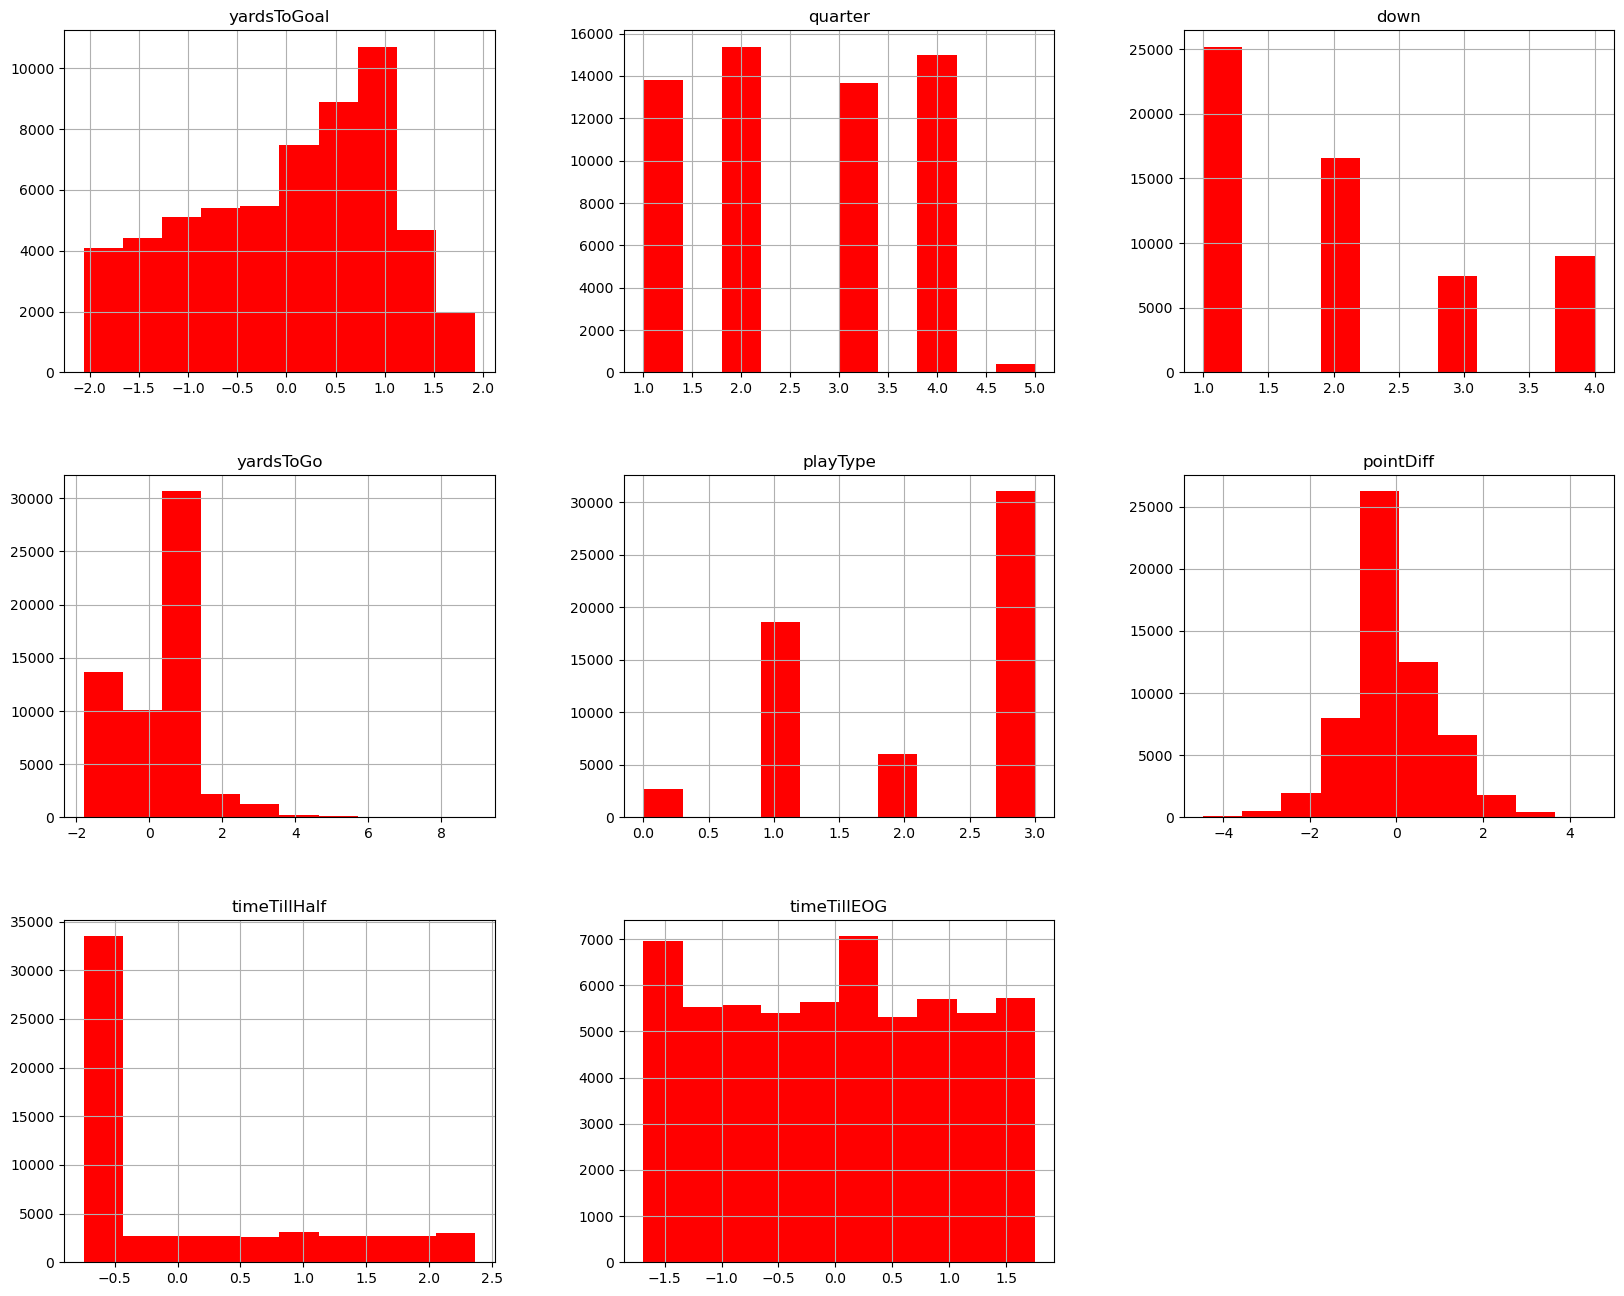

In [48]:
# Didsplay histogram for all features

import matplotlib.pyplot as plt
%matplotlib inline

df_major.hist(figsize=(20, 16), color='r')

plt.show()

We can see that our target feature, playType, is unbalanced 

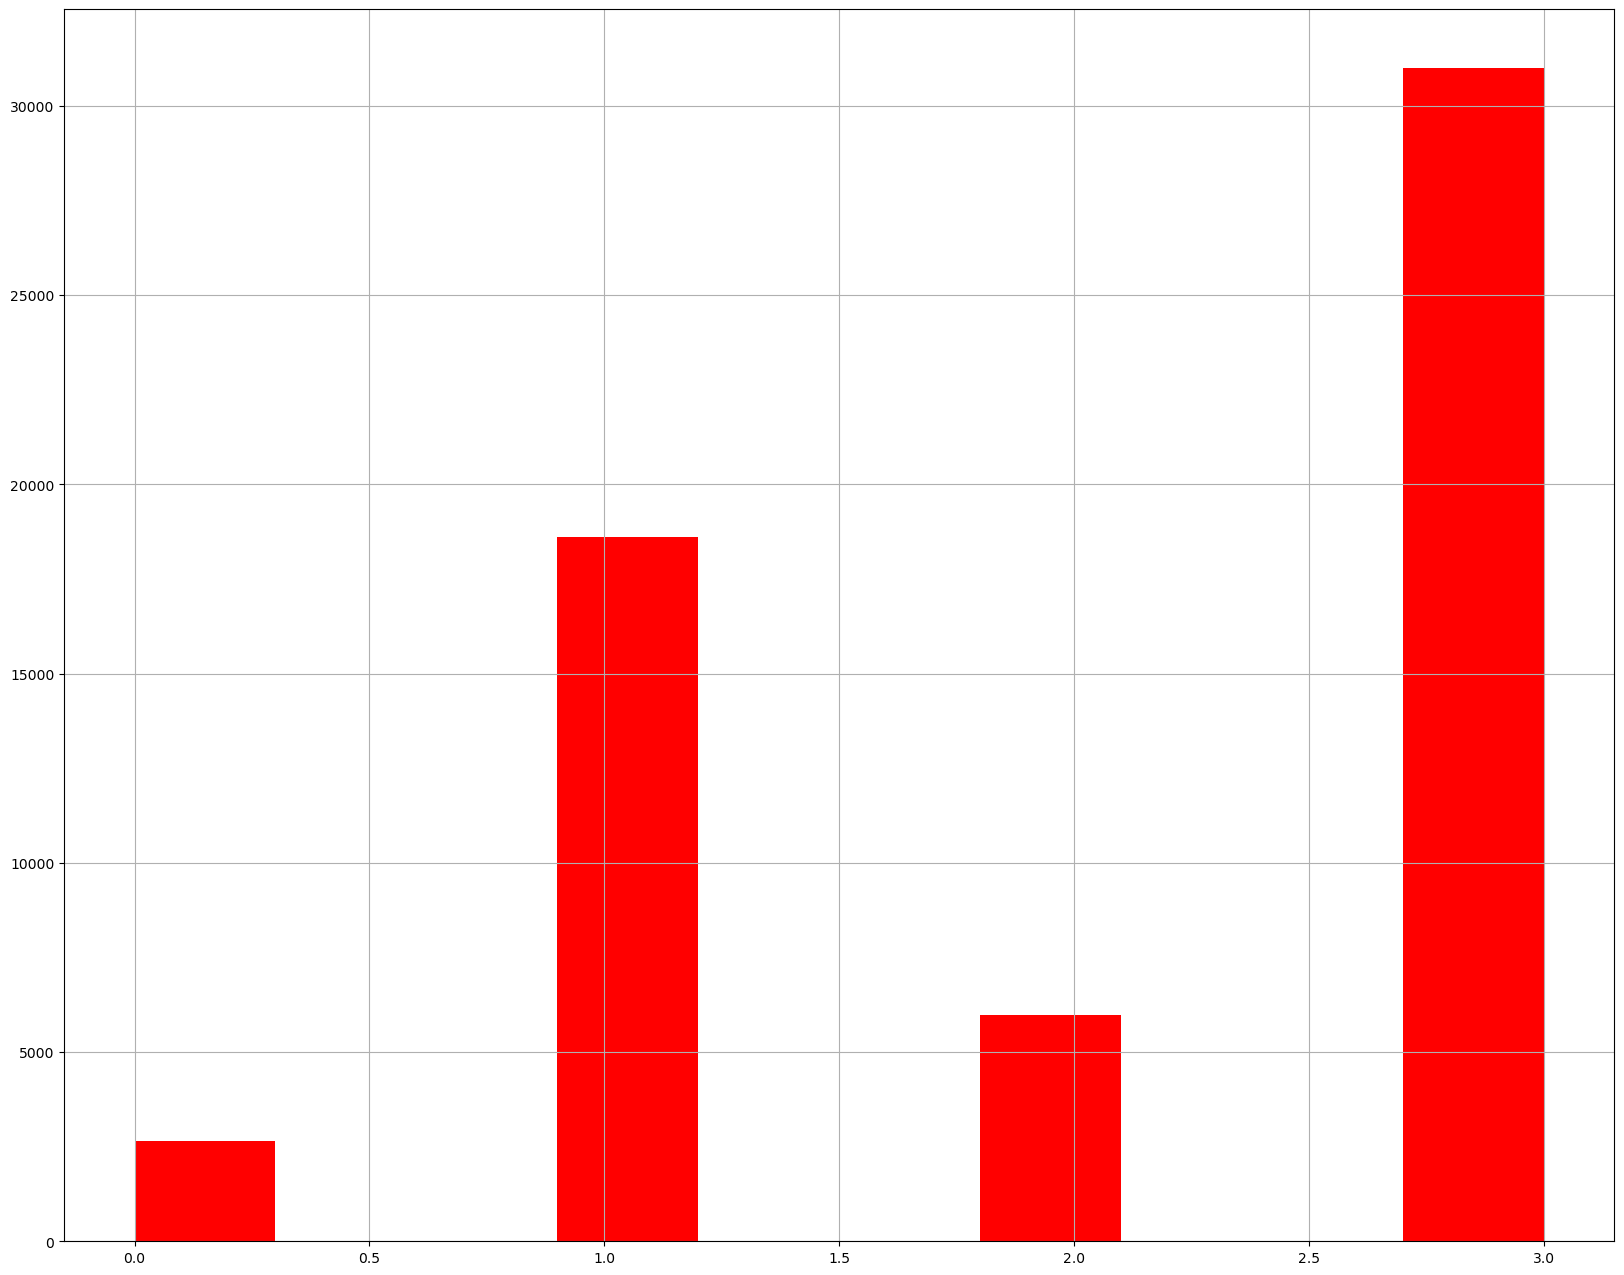

In [49]:
%matplotlib inline

df_major["playType"].hist(figsize=(20, 16), color='r')

plt.show()

If we train a model such as a neural network with this unbalanced target feature sample, we will get a lower accuracy than compared to if we did have a balanced target feature sample.

### Example (unbalanced): 

In [51]:
X = df_major.drop("playType", axis=1)  # Features excluding the target feature
y = df_major["playType"]  # Target feature

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter = 300, activation='relu')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.775984894000515
Confusion Matrix:
[[ 519   12    5    5]
 [  42 1833   16 1872]
 [  11    3 1162    3]
 [  24  606   11 5527]]


In [52]:
# Metric report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       541
           1       0.75      0.49      0.59      3763
           2       0.97      0.99      0.98      1179
           3       0.75      0.90      0.81      6168

    accuracy                           0.78     11651
   macro avg       0.83      0.83      0.82     11651
weighted avg       0.78      0.78      0.76     11651



We get an accuracy of 77.6%. The unbalanced nature of our target feature can cause overfitting. Let us oversample on the features that are under-represented to prevent this. 

## Balance Target Feature

Divide dataframe into X (features) and y (target feature) 

In [53]:
# Oversampling:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')

X_resampled, y_resampled = ros.fit_resample(X, y)

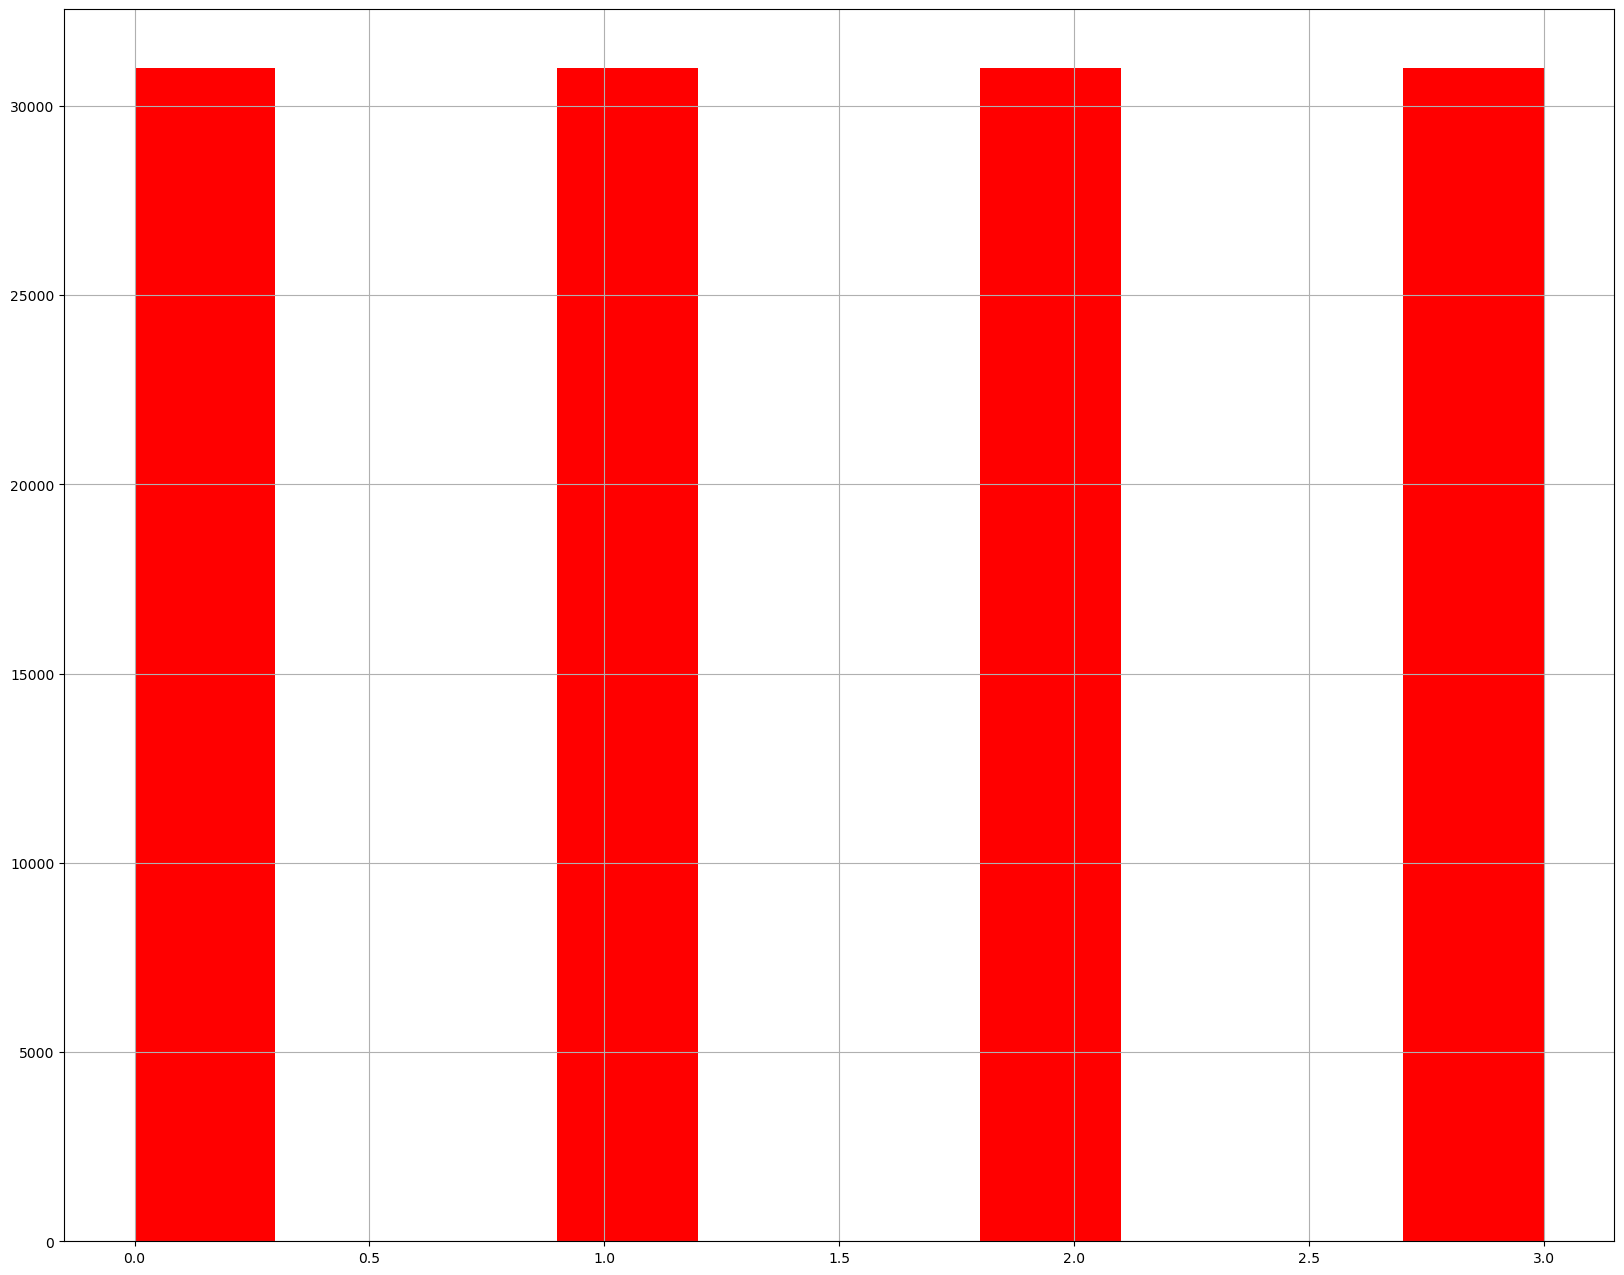

In [54]:
y_resampled.hist(figsize=(20, 16), color='r')

plt.show()

We can see that our target feature is now equally represented.

## Split Data

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (99222, 7)
X_test shape: (24806, 7)
y_train shape: (99222,)
y_test shape: (24806,)


# 8: Neural Network Model
### With balanced target feature

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

modelNN = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter = 300, activation='relu')

modelNN.fit(X_train, y_train)

y_pred_NN = modelNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_NN)

conf_matrix = confusion_matrix(y_test, y_pred_NN)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8456824961702814
Confusion Matrix:
[[6085    3   32    0]
 [ 111 3845   53 2296]
 [  44    0 6190    0]
 [  37 1235   17 4858]]


In [83]:
# Metric report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_NN, digits=5))

              precision    recall  f1-score   support

           0    0.96941   0.99428   0.98169      6120
           1    0.75644   0.60983   0.67527      6305
           2    0.98379   0.99294   0.98834      6234
           3    0.67906   0.79030   0.73047      6147

    accuracy                        0.84568     24806
   macro avg    0.84718   0.84684   0.84394     24806
weighted avg    0.84694   0.84568   0.84323     24806



We can see that all of our metrics (especially our accuracy) are much higher after we oversampled and balanced the target feature.

# 9: K-Nearest Neighbor Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(X_train, y_train)

y_pred_KNN = modelKNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_KNN)

print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_KNN)

print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8295170523260501
Confusion Matrix:
[[6066   28   23    3]
 [ 227 3873   67 2138]
 [ 123    0 6111    0]
 [  91 1508   21 4527]]


In [85]:
print(classification_report(y_test, y_pred_KNN, digits=5))

              precision    recall  f1-score   support

           0    0.93223   0.99118   0.96080      6120
           1    0.71603   0.61427   0.66126      6305
           2    0.98216   0.98027   0.98121      6234
           3    0.67891   0.73646   0.70652      6147

    accuracy                        0.82952     24806
   macro avg    0.82733   0.83054   0.82745     24806
weighted avg    0.82705   0.82952   0.82678     24806



# 10: Decision Tree

In [97]:
from sklearn import tree

modelDT = tree.DecisionTreeClassifier(criterion="entropy")

modelDT.fit(X_train, y_train)

y_pred_DT = modelDT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_DT)

print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_DT)

print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8828509231637507
Confusion Matrix:
[[6120    0    0    0]
 [   9 5170   18 1108]
 [   0    4 6230    0]
 [  10 1748    9 4380]]


In [98]:
print(classification_report(y_test, y_pred_DT, digits=5))

              precision    recall  f1-score   support

           0    0.99691   1.00000   0.99845      6120
           1    0.74689   0.81998   0.78173      6305
           2    0.99568   0.99936   0.99752      6234
           3    0.79810   0.71254   0.75290      6147

    accuracy                        0.88285     24806
   macro avg    0.88440   0.88297   0.88265     24806
weighted avg    0.88379   0.88285   0.88228     24806



# 11: Analysis

Out of our 3 models, the Decision Tree for multi-classification had the best metrics compared to the other models. It consistantly gets the highest accuracy, and for each playType receives the highest precision, recall, and f1-score compared to the other models. 

## Hyperparameter Tuning Neural Network

A hyperparameter we will like to test are the hidden layers sizes

In [88]:
# NEURAL NETWORK 1

modelNN_1 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter = 300, activation='relu', random_state=2)

modelNN_1.fit(X_train, y_train)

y_pred_NN_1 = modelNN_1.predict(X_test)

accuracy_NN_1 = accuracy_score(y_test, y_pred_NN_1)

print("Accuracy NN 1:", accuracy_NN_1)

# NEURAL NETWORK 2

modelNN_2 = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter = 300, activation='relu', random_state=2)

modelNN_2.fit(X_train, y_train)

y_pred_NN_2 = modelNN_2.predict(X_test)

accuracy_NN_2 = accuracy_score(y_test, y_pred_NN_2)

print("Accuracy NN 2:", accuracy_NN_2)

# NEURAL NETWORK 3

modelNN_3 = MLPClassifier(hidden_layer_sizes=(64), max_iter = 300, activation='relu', random_state=2)

modelNN_3.fit(X_train, y_train)

y_pred_NN_3 = modelNN_3.predict(X_test)

accuracy_NN_3 = accuracy_score(y_test, y_pred_NN_3)

print("Accuracy NN 3:", accuracy_NN_3)

Accuracy NN 1: 0.8470128194791583
Accuracy NN 2: 0.833185519632347
Accuracy NN 3: 0.8380230589373538


Each neural network test has the same random state. With these 3 options, it appears the best option for the hidden layer sizes hyperparameter is (64, 32)

## Hyperparameter Tuning K-Nearest-Neighbors

In [94]:
# KNN 1

modelKNN_1 = KNeighborsClassifier(n_neighbors=5)

modelKNN_1.fit(X_train, y_train)

y_pred_KNN_1 = modelKNN_1.predict(X_test)

accuracy_KNN_1 = accuracy_score(y_test, y_pred_KNN_1)

print("Accuracy KNN 1:", accuracy_KNN_1)

# KNN 2

modelKNN_2 = KNeighborsClassifier(n_neighbors=15)

modelKNN_2.fit(X_train, y_train)

y_pred_KNN_2 = modelKNN_2.predict(X_test)

accuracy_KNN_2 = accuracy_score(y_test, y_pred_KNN_2)

print("Accuracy KNN 2:", accuracy_KNN_2)

# KNN 3

modelKNN_3 = KNeighborsClassifier(n_neighbors=30)

modelKNN_3.fit(X_train, y_train)

y_pred_KNN_3 = modelKNN_3.predict(X_test)

accuracy_KNN_3 = accuracy_score(y_test, y_pred_KNN_3)

print("Accuracy KNN 3:", accuracy_KNN_3)

Accuracy KNN 1: 0.8429009110699024
Accuracy KNN 2: 0.8295170523260501
Accuracy KNN 3: 0.8250423284689188


It appears that the KNN model with n_neighbors = 5 gave the highest accuracy compared to the other n_neighbors option.

## Hyperparameter Tuning Decision Tree

In [93]:
# DT 1

modelDT_1 = tree.DecisionTreeClassifier(criterion="gini", random_state=2)

modelDT_1.fit(X_train, y_train)

y_pred_DT_1 = modelDT_1.predict(X_test)

accuracy_DT_1 = accuracy_score(y_test, y_pred_DT_1)

print("Accuracy DT 1:", accuracy_DT_1)

# DT 2

modelDT_2 = tree.DecisionTreeClassifier(criterion="entropy", random_state=2)

modelDT_2.fit(X_train, y_train)

y_pred_DT_2 = modelDT_2.predict(X_test)

accuracy_DT_2 = accuracy_score(y_test, y_pred_DT_2)

print("Accuracy DT 2:", accuracy_DT_2)

# DT 3

modelDT_3 = tree.DecisionTreeClassifier(criterion="log_loss", random_state=2)

modelDT_3.fit(X_train, y_train)

y_pred_DT_3 = modelDT_3.predict(X_test)

accuracy_DT_3 = accuracy_score(y_test, y_pred_DT_3)

print("Accuracy DT 3:", accuracy_DT_3)

Accuracy DT 1: 0.8791018302023704
Accuracy DT 2: 0.8818027896476659
Accuracy DT 3: 0.8818027896476659


We can see that having the hyperparameter criterion be "entropy" instead of the default "gini", we achieve a higher accuracy. 